# Project 3: Web APIs & NLP (Data Cleaning, Preprocessing and EDA)

## Part 2: Data Cleaning and Preprocessing

### Import Libraries

In [3]:
#import libraries
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import pickle

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cherylleong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cherylleong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Create functions to clean data

In [5]:
#function to replace URL, punctuations and non-ascii characters with empty string
def clean(text):

    #lowercase all letters
    text = str(text.lower())
    
    #remove numerical values
    text = re.sub(" \d+", "", text)
    
    #remove 2 or less words
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    #remove URLs
    text = re.sub(r'http\S+', '', text)
    
    #remove non-ascii characters
    text = text.encode('ascii', errors = 'ignore').decode()
    
    #replace \n with space
    text = re.sub(r"(?<!\\)\\n|\n", " ", text)
    
    #remove punctuations
    text = re.sub("[^\w\s]", '', text)
    
    #somehow removing non-ascii chars unable to remove &amp and x200b completely
    text = text.replace('amp', '')
    text = text.replace('x200b', '')
    
    return text

### Data Cleaning and Preprocessing for r/iPhone

In [6]:
#import csv for r/iphone
iphone = pd.read_csv('datasets/iphone.csv', low_memory=False)
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 500

In [7]:
#check if correctly imported
iphone.head()

,all_awardings,allow_live_comments,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_metadata,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,post_hint,preview,removed_by_category,url_overridden_by_dest,link_flair_css_class,link_flair_template_id,link_flair_text,media,media_embed,secure_media,secure_media_embed,crosspost_parent,crosspost_parent_list,author_cakeday,suggested_sort,banned_by
0,[],False,Kriskao,#014980,5Cblue,[],a7b36636-1056-11eb-b764-0ecaaa7f64cd,iPhone 12 Mini,light,text,t2_kdcr2da,False,False,False,[],False,False,1659534803,self.iphone,https://www.reddit.com/r/iphone/comments/wf77t...,{},wf77tx,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,"{'dq43g9n97if91': {'e': 'Image', 'id': 'dq43g9...",False,True,0,0,False,all_ads,/r/iphone/comments/wf77tx/apples_blues/,False,6,1659534814,1,&amp;#x200B;\n\n[I noticed each apple blue pro...,True,False,False,iphone,t5_2qh2b,3678107,public,https://b.thumbs.redditmedia.com/4uj8XwciXgwzG...,104.0,140.0,Apple's blues,0,[],1.0,https://www.reddit.com/r/iphone/comments/wf77t...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Igniteisbad,NaN,NaN,[],NaN,NaN,NaN,text,t2_cbs0pird,False,False,False,[],False,False,1659534340,i.redd.it,https://www.reddit.com/r/iphone/comments/wf718...,{},wf7183,False,False,False,False,True,False,False,False,NaN,[],dark,text,False,NaN,False,True,0,0,False,all_ads,/r/iphone/comments/wf7183/blurry_corner/,False,6,1659534352,1,The top left kind of corner on my iPhone 12 is...,True,False,False,iphone,t5_2qh2b,3678104,public,https://a.thumbs.redditmedia.com/DfrGeo9ElGqgx...,140.0,140.0,Blurry corner,0,[],1.0,https://i.redd.it/c7zjzhp36if91.jpg,all_ads,6,image,"{'enabled': True, 'images': [{'id': 'Ooq7Rtk2w...",automod_filtered,https://i.redd.it/c7zjzhp36if91.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Neverstophoping19,NaN,NaN,[],NaN,NaN,NaN,text,t2_85e4s0qq,False,False,False,[],False,False,1659534112,self.iphone,https://www.reddit.com/r/iphone/comments/wf6y1...,{},wf6y1m,False,True,False,False,False,True,True,False,#d3d6da,[],dark,text,False,NaN,False,True,0,0,False,all_ads,/r/iphone/comments/wf6y1m/iphone_13_pro_max_or...,False,6,1659534123,1,iPhone 13 pro max now or is it better to wait ...,True,False,False,iphone,t5_2qh2b,3678101,public,self,NaN,NaN,Iphone 13 pro max or wait for iPhone 14,0,[],1.0,https://www.reddit.com/r/iphone/comments/wf6y1...,all_ads,6,NaN,NaN,NaN,NaN,grey,5664e798-6985-11e8-b750-0eaf69e27a44,Discussion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,t1msh3l,NaN,NaN,[],NaN,NaN,NaN,text,t2_t73xy,False,False,False,[],False,False,1659533915,self.iphone,https://www.reddit.com/r/iphone/comments/wf6vc...,{},wf6vcr,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,"{'07195fts4if91': {'e': 'Image', 'id': '07195f...",False,True,0,0,False,all_ads,/r/iphone/comments/wf6vcr/switched_from_a_pixe...,False,6,1659533926,1,There are some weird things going on with my m...,True,False,False,iphone,t5_2qh2b,3678098,public,https://b.thumbs.redditmedia.com/JAsVAMdT4jVbh...,140.0,140.0,Switched from a Pixel 6 to iPhone 13. Now I ca...,0,[],1.0,https://www.reddit.com/r/iphone/comments/wf6vc...,a

In [8]:
iphone.shape

(9971, 81)

In [9]:
#extract relevant columns
iphone_df = iphone[['title', 'selftext', 'subreddit']]

In [10]:
#check if correctly extracted
iphone_df.head()

,title,selftext,subreddit
0,Apple's blues,&amp;#x200B;\n\n[I noticed each apple blue pro...,iphone
1,Blurry corner,The top left kind of corner on my iPhone 12 is...,iphone
2,Iphone 13 pro max or wait for iPhone 14,iPhone 13 pro max now or is it better to wait ...,iphone
3,Switched from a Pixel 6 to iPhone 13. Now I ca...,There are some weird things going on with my m...,iphone
4,Is it worth buying iPhone pro max now or is it...,"Hey there, I’ve had iphone 4, iphone 8, and cu...",iphone


In [11]:
#check for null values
iphone_df.isnull().sum()

title           0
selftext     2216
subreddit       0
dtype: int64

In [12]:
#drop rows with empty selftext
iphone_df.dropna(subset=['selftext'], inplace=True)
iphone_df.isnull().sum()

title        0
selftext     0
subreddit    0
dtype: int64

In [13]:
iphone_df.shape

(7755, 3)

In [14]:
#drop rows with empty strings in title and selftext
iphone_df = iphone_df[iphone_df['selftext'].str.contains('[removed] | [deleted] | [View Poll]') == True]
iphone_df = iphone_df[iphone_df['title'].str.contains('[removed] | [deleted] | [View Poll]') == True]

In [15]:
#remove duplicates (same values in 'title' and 'selftext')
iphone_df.drop_duplicates(subset=['title','selftext'], keep='first', inplace=True)

In [16]:
#replace URL, punctuations and non-ascii characters with empty string
iphone_df['title'] = iphone_df['title'].map(lambda text: clean(text))
iphone_df['selftext'] = iphone_df['selftext'].map(lambda text: clean(text))

In [18]:
iphone_df.shape

(5582, 3)

In [19]:
iphone_df.head()

,title,selftext,subreddit
2,iphone pro max wait for iphone,iphone pro max now better wait for the iph...,iphone
3,switched from pixel iphone now can receive ...,there are some weird things going with messa...,iphone
4,worth buying iphone pro max now better w...,hey there had iphone iphone and currently usi...,iphone
5,iphone keeps going between normal and green,iphone recently got really wet storm and si...,iphone
8,apple launching dsp advanced ads platform,one surprise the promises privacy tech gi...,iphone


### Data Cleaning and Preprocessing for r/GooglePixel

In [20]:
#import csv for r/pixel
pixel = pd.read_csv('datasets/pixel.csv', low_memory=False)
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 500

In [21]:
#check if correctly imported
pixel.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,author_flair_background_color,author_flair_template_id,author_flair_text_color,post_hint,preview,removed_by_category,thumbnail_height,thumbnail_width,url_overridden_by_dest,crosspost_parent,crosspost_parent_list,media,media_embed,secure_media,secure_media_embed,author_cakeday,suggested_sort,banned_by,call_to_action,category,edited
0,[],False,techsub22,NaN,[],NaN,text,t2_4fbum3bb,False,False,False,[],False,False,1659535413,self.GooglePixel,https://www.reddit.com/r/GooglePixel/comments/...,{},wf7gpl,False,True,False,False,False,True,True,False,#373c3f,"[{'e': 'text', 't': 'Pixel 5'}]",52cb4644-0272-11eb-8748-0e3f948d4571,Pixel 5,light,richtext,False,False,True,0,0,False,all_ads,/r/GooglePixel/comments/wf7gpl/will_the_pixel_...,False,6,1659535424,1,I change phones every 2-3 years and the Pixel ...,True,False,False,GooglePixel,t5_3aobb,841642,public,self,Will the Pixel 5 be able to safely last anothe...,0,[],1.0,https://www.reddit.com/r/GooglePixel/comments/...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Ready_Dark_,NaN,[],NaN,text,t2_c0woccy5,False,False,False,[],False,False,1659535137,self.GooglePixel,https://www.reddit.com/r/GooglePixel/comments/...,{},wf7ch9,False,True,False,False,False,True,True,False,NaN,[],NaN,NaN,dark,text,False,False,True,0,0,False,all_ads,/r/GooglePixel/comments/wf7ch9/sent_my_pixel4a...,False,6,1659535148,1,My 4a's touch screen was partially not working...,True,False,False,GooglePixel,t5_3aobb,841638,public,self,Sent my pixel4a to B2X (out of warranty) and w...,0,[],1.0,https://www.reddit.com/r/GooglePixel/comments/...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,ZubiFett,clearlywhite3a,"[{'e': 'text', 't': 'Pixel 3a '}, {'a': ':pixe...",Pixel 3a :pixel3awhite:,richtext,t2_15amf8,False,False,False,[],False,False,1659534933,self.GooglePixel,https://www.reddit.com/r/GooglePixel/comments/...,{},wf79nf,False,True,False,False,False,True,True,False,#373c3f,"[{'e': 'text', 't': 'Pixel 6'}]",3473bbfc-314e-11ec-a959-629ce623f82d,Pixel 6,light,richtext,False,False,True,0,0,False,all_ads,/r/GooglePixel/comments/wf79nf/sick_of_the_bug...,False,6,1659534944,1,That's it... I'm so burned out to put up with ...,True,False,False,GooglePixel,t5_3aobb,841637,public,self,Sick of the bugs in the Pixel 6,0,[],1.0,https://www.reddit.com/r/GooglePixel/comments/...,all_ads,6,#e9ecec,e8df3242-753f-11e9-873d-0e4b6ae92062,dark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,usaxoom21212,NaN,[],NaN,text,t2_qpv9g89k,False,False,False,[],False,False,1659534253,usaxoom.com,https://www.reddit.com/r/GooglePixel/comments/...,{},wf6zzy,False,False,False,False,False,False,False,False,NaN,[],NaN,NaN,dark,text,False,False,True,0,0,False,all_ads,/r/GooglePixel/comments/wf6zzy/buy_facebook_ad...,False,6,1659534264,1,NaN,True,False,False,GooglePixel,t5_3aobb,841632,public,https://a.thumbs.redditmedia.com/z0arR9GW7V0MA...,Buy Facebook Ads Accounts - 100% document Veri...,0,[],1.0,https://usaxoom.com/product/buy-facebook-ads-a...,all_ads,6,NaN,NaN,NaN,link,"{'enabled': 

In [22]:
pixel.shape

(9990, 82)

In [23]:
#extract relevant columns
pixel_df = pixel[['title', 'selftext', 'subreddit']]

In [24]:
#check if correctly extracted
pixel_df.head()

,title,selftext,subreddit
0,Will the Pixel 5 be able to safely last anothe...,I change phones every 2-3 years and the Pixel ...,GooglePixel
1,Sent my pixel4a to B2X (out of warranty) and w...,My 4a's touch screen was partially not working...,GooglePixel
2,Sick of the bugs in the Pixel 6,That's it... I'm so burned out to put up with ...,GooglePixel
3,Buy Facebook Ads Accounts - 100% document Veri...,NaN,GooglePixel
4,Clock suddenly dark?,"Hey everyone, is anyone else having a weird is...",GooglePixel


In [25]:
#check for null values
pixel_df.isnull().sum()

title          0
selftext     785
subreddit      0
dtype: int64

In [26]:
#drop rows with empty selftext
pixel_df.dropna(subset=['selftext'], inplace=True)
pixel_df.isnull().sum()

title        0
selftext     0
subreddit    0
dtype: int64

In [27]:
pixel_df.shape

(9205, 3)

In [28]:
#drop rows with empty strings in title and selftext
pixel_df = pixel_df[pixel_df['selftext'].str.contains('[removed] | [deleted] | [View Poll]') == True]
pixel_df = pixel_df[pixel_df['title'].str.contains('[removed] | [deleted] | [View Poll]') == True]

In [29]:
#remove duplicate rows (same values in 'title' and 'selftext')
pixel_df.drop_duplicates(subset=['title','selftext'], keep='first', inplace=True)

In [30]:
#replace URL, punctuations and non-ascii characters with empty string
pixel_df['title'] = pixel_df['title'].map(lambda text: clean(text))
pixel_df['selftext'] = pixel_df['selftext'].map(lambda text: clean(text))

In [32]:
pixel_df.shape

(5422, 3)

In [33]:
pixel_df.head()

,title,selftext,subreddit
0,will the pixel able safely last another year...,change phones every years and the pixel curr...,GooglePixel
1,sent pixel4a b2x out warranty and worried a...,mya touch screen was partially not working po...,GooglePixel
2,sick the bugs the pixel,that burned out put with bugs this thing...,GooglePixel
5,not try install the beta locked bootloader,your bootloader locked one the dumbest thi...,GooglePixel
7,slow notifications after factory reset,factory reset p6p try clear some the gunk...,GooglePixel


### Combine DataFrames

In [34]:
df = pd.concat([iphone_df,pixel_df], ignore_index=True)
pd.options.display.max_columns = 500

In [35]:
#check if correctly combined
df.head()

,title,selftext,subreddit
0,iphone pro max wait for iphone,iphone pro max now better wait for the iph...,iphone
1,switched from pixel iphone now can receive ...,there are some weird things going with messa...,iphone
2,worth buying iphone pro max now better w...,hey there had iphone iphone and currently usi...,iphone
3,iphone keeps going between normal and green,iphone recently got really wet storm and si...,iphone
4,apple launching dsp advanced ads platform,one surprise the promises privacy tech gi...,iphone


In [36]:
df.tail()

,title,selftext,subreddit
10999,pixel update animation bug anyone else experie...,prerequisites pixel animations config set fal...,GooglePixel
11000,country code issue google contacts,having this issue with contacts all conta...,GooglePixel
11001,things that stand out about pixel pro,considering upgrading pixel pro from trust...,GooglePixel
11002,custom rom recommendation pixel,have pixel looking for stable android rom...,GooglePixel
11003,why can use hotspot without needing restart ...,don know when started but when turn hotspo...,GooglePixel


In [37]:
df.shape

(11004, 3)

In [38]:
#Combine title and selftext as a single column and investigate
df['all'] = df['title'] + ' ' + df['selftext']
df2 = df[['subreddit','title','selftext','all']]
df2.head()

,subreddit,title,selftext,all
0,iphone,iphone pro max wait for iphone,iphone pro max now better wait for the iph...,iphone pro max wait for iphone iphone pro max...
1,iphone,switched from pixel iphone now can receive ...,there are some weird things going with messa...,switched from pixel iphone now can receive ...
2,iphone,worth buying iphone pro max now better w...,hey there had iphone iphone and currently usi...,worth buying iphone pro max now better w...
3,iphone,iphone keeps going between normal and green,iphone recently got really wet storm and si...,iphone keeps going between normal and green i...
4,iphone,apple launching dsp advanced ads platform,one surprise the promises privacy tech gi...,apple launching dsp advanced ads platform ...


In [39]:
df2.tail()

,subreddit,title,selftext,all
10999,GooglePixel,pixel update animation bug anyone else experie...,prerequisites pixel animations config set fal...,pixel update animation bug anyone else experie...
11000,GooglePixel,country code issue google contacts,having this issue with contacts all conta...,country code issue google contacts having t...
11001,GooglePixel,things that stand out about pixel pro,considering upgrading pixel pro from trust...,things that stand out about pixel pro conside...
11002,GooglePixel,custom rom recommendation pixel,have pixel looking for stable android rom...,custom rom recommendation pixel have pixel...
11003,GooglePixel,why can use hotspot without needing restart ...,don know when started but when turn hotspo...,why can use hotspot without needing restart ...


In [40]:
#change subreddit to lower case
df2['subreddit'] = df2['subreddit'].str.lower()

In [41]:
df2.tail()

,subreddit,title,selftext,all
10999,googlepixel,pixel update animation bug anyone else experie...,prerequisites pixel animations config set fal...,pixel update animation bug anyone else experie...
11000,googlepixel,country code issue google contacts,having this issue with contacts all conta...,country code issue google contacts having t...
11001,googlepixel,things that stand out about pixel pro,considering upgrading pixel pro from trust...,things that stand out about pixel pro conside...
11002,googlepixel,custom rom recommendation pixel,have pixel looking for stable android rom...,custom rom recommendation pixel have pixel...
11003,googlepixel,why can use hotspot without needing restart ...,don know when started but when turn hotspo...,why can use hotspot without needing restart ...


### Tokenize

In [42]:
# Instantiate RegExp Tokenizer
tokenizer = RegexpTokenizer(r'[a-z]+') 

In [43]:
# "Run" Tokenizer
df2['all_token'] = df2.apply(lambda row: tokenizer.tokenize(row['all'].lower()), axis = 1)

In [44]:
df2.head() 

,subreddit,title,selftext,all,all_token
0,iphone,iphone pro max wait for iphone,iphone pro max now better wait for the iph...,iphone pro max wait for iphone iphone pro max...,"[iphone, pro, max, wait, for, iphone, iphone, ..."
1,iphone,switched from pixel iphone now can receive ...,there are some weird things going with messa...,switched from pixel iphone now can receive ...,"[switched, from, pixel, iphone, now, can, rece..."
2,iphone,worth buying iphone pro max now better w...,hey there had iphone iphone and currently usi...,worth buying iphone pro max now better w...,"[worth, buying, iphone, pro, max, now, better,..."
3,iphone,iphone keeps going between normal and green,iphone recently got really wet storm and si...,iphone keeps going between normal and green i...,"[iphone, keeps, going, between, normal, and, g..."
4,iphone,apple launching dsp advanced ads platform,one surprise the promises privacy tech gi...,apple launching dsp advanced ads platform ...,"[apple, launching, dsp, advanced, ads, platfor..."


In [45]:
df2.tail()

,subreddit,title,selftext,all,all_token
10999,googlepixel,pixel update animation bug anyone else experie...,prerequisites pixel animations config set fal...,pixel update animation bug anyone else experie...,"[pixel, update, animation, bug, anyone, else, ..."
11000,googlepixel,country code issue google contacts,having this issue with contacts all conta...,country code issue google contacts having t...,"[country, code, issue, google, contacts, havin..."
11001,googlepixel,things that stand out about pixel pro,considering upgrading pixel pro from trust...,things that stand out about pixel pro conside...,"[things, that, stand, out, about, pixel, pro, ..."
11002,googlepixel,custom rom recommendation pixel,have pixel looking for stable android rom...,custom rom recommendation pixel have pixel...,"[custom, rom, recommendation, pixel, have, pix..."
11003,googlepixel,why can use hotspot without needing restart ...,don know when started but when turn hotspo...,why can use hotspot without needing restart ...,"[why, can, use, hotspot, without, needing, res..."


### Stop Words

In [46]:
#remove general stopwords in the english language 
#remove additional words that are common for both subreddits
add_words = ['phone', 'mobile', 'handphone', 'pro', 'would', 'like', 'get', 'app', 'screen']
stop_words = stopwords.words('english') + add_words

df2['clean_token'] = df2['all_token'].apply(lambda row: [word for word in row if word not in stop_words])

In [47]:
df2.head()

,subreddit,title,selftext,all,all_token,clean_token
0,iphone,iphone pro max wait for iphone,iphone pro max now better wait for the iph...,iphone pro max wait for iphone iphone pro max...,"[iphone, pro, max, wait, for, iphone, iphone, ...","[iphone, max, wait, iphone, iphone, max, bette..."
1,iphone,switched from pixel iphone now can receive ...,there are some weird things going with messa...,switched from pixel iphone now can receive ...,"[switched, from, pixel, iphone, now, can, rece...","[switched, pixel, iphone, receive, photos, and..."
2,iphone,worth buying iphone pro max now better w...,hey there had iphone iphone and currently usi...,worth buying iphone pro max now better w...,"[worth, buying, iphone, pro, max, now, better,...","[worth, buying, iphone, max, better, wait, iph..."
3,iphone,iphone keeps going between normal and green,iphone recently got really wet storm and si...,iphone keeps going between normal and green i...,"[iphone, keeps, going, between, normal, and, g...","[iphone, keeps, going, normal, green, iphone, ..."
4,iphone,apple launching dsp advanced ads platform,one surprise the promises privacy tech gi...,apple launching dsp advanced ads platform ...,"[apple, launching, dsp, advanced, ads, platfor...","[apple, launching, dsp, advanced, ads, platfor..."


In [48]:
df2.tail()

,subreddit,title,selftext,all,all_token,clean_token
10999,googlepixel,pixel update animation bug anyone else experie...,prerequisites pixel animations config set fal...,pixel update animation bug anyone else experie...,"[pixel, update, animation, bug, anyone, else, ...","[pixel, update, animation, bug, anyone, else, ..."
11000,googlepixel,country code issue google contacts,having this issue with contacts all conta...,country code issue google contacts having t...,"[country, code, issue, google, contacts, havin...","[country, code, issue, google, contacts, issue..."
11001,googlepixel,things that stand out about pixel pro,considering upgrading pixel pro from trust...,things that stand out about pixel pro conside...,"[things, that, stand, out, about, pixel, pro, ...","[things, stand, pixel, considering, upgrading,..."
11002,googlepixel,custom rom recommendation pixel,have pixel looking for stable android rom...,custom rom recommendation pixel have pixel...,"[custom, rom, recommendation, pixel, have, pix...","[custom, rom, recommendation, pixel, pixel, lo..."
11003,googlepixel,why can use hotspot without needing restart ...,don know when started but when turn hotspo...,why can use hotspot without needing restart ...,"[why, can, use, hotspot, without, needing, res...","[use, hotspot, without, needing, restart, pixe..."


### Lemmatizing

In [49]:
# Instantiate lemmatizer.
lemmatizer = WordNetLemmatizer()

In [50]:
# Lemmatize tokens.
def lemmatize_text(row):
    return [lemmatizer.lemmatize(i) for i in row] 

df2['lem_token'] = df2['clean_token'].apply(lemmatize_text)

In [51]:
df2.head()

,subreddit,title,selftext,all,all_token,clean_token,lem_token
0,iphone,iphone pro max wait for iphone,iphone pro max now better wait for the iph...,iphone pro max wait for iphone iphone pro max...,"[iphone, pro, max, wait, for, iphone, iphone, ...","[iphone, max, wait, iphone, iphone, max, bette...","[iphone, max, wait, iphone, iphone, max, bette..."
1,iphone,switched from pixel iphone now can receive ...,there are some weird things going with messa...,switched from pixel iphone now can receive ...,"[switched, from, pixel, iphone, now, can, rece...","[switched, pixel, iphone, receive, photos, and...","[switched, pixel, iphone, receive, photo, andr..."
2,iphone,worth buying iphone pro max now better w...,hey there had iphone iphone and currently usi...,worth buying iphone pro max now better w...,"[worth, buying, iphone, pro, max, now, better,...","[worth, buying, iphone, max, better, wait, iph...","[worth, buying, iphone, max, better, wait, iph..."
3,iphone,iphone keeps going between normal and green,iphone recently got really wet storm and si...,iphone keeps going between normal and green i...,"[iphone, keeps, going, between, normal, and, g...","[iphone, keeps, going, normal, green, iphone, ...","[iphone, keep, going, normal, green, iphone, r..."
4,iphone,apple launching dsp advanced ads platform,one surprise the promises privacy tech gi...,apple launching dsp advanced ads platform ...,"[apple, launching, dsp, advanced, ads, platfor...","[apple, launching, dsp, advanced, ads, platfor...","[apple, launching, dsp, advanced, ad, platform..."


In [52]:
df2.tail()

,subreddit,title,selftext,all,all_token,clean_token,lem_token
10999,googlepixel,pixel update animation bug anyone else experie...,prerequisites pixel animations config set fal...,pixel update animation bug anyone else experie...,"[pixel, update, animation, bug, anyone, else, ...","[pixel, update, animation, bug, anyone, else, ...","[pixel, update, animation, bug, anyone, else, ..."
11000,googlepixel,country code issue google contacts,having this issue with contacts all conta...,country code issue google contacts having t...,"[country, code, issue, google, contacts, havin...","[country, code, issue, google, contacts, issue...","[country, code, issue, google, contact, issue,..."
11001,googlepixel,things that stand out about pixel pro,considering upgrading pixel pro from trust...,things that stand out about pixel pro conside...,"[things, that, stand, out, about, pixel, pro, ...","[things, stand, pixel, considering, upgrading,...","[thing, stand, pixel, considering, upgrading, ..."
11002,googlepixel,custom rom recommendation pixel,have pixel looking for stable android rom...,custom rom recommendation pixel have pixel...,"[custom, rom, recommendation, pixel, have, pix...","[custom, rom, recommendation, pixel, pixel, lo...","[custom, rom, recommendation, pixel, pixel, lo..."
11003,googlepixel,why can use hotspot without needing restart ...,don know when started but when turn hotspo...,why can use hotspot without needing restart ...,"[why, can, use, hotspot, without, needing, res...","[use, hotspot, without, needing, restart, pixe...","[use, hotspot, without, needing, restart, pixe..."


In [53]:
#Print only those lemmatized tokens that are different in a random row.
for i in range(len(df2['clean_token'][5])):
    if df2['clean_token'][5][i] != df2['lem_token'][5][i]:
        print((df2['clean_token'][5][i], df2['lem_token'][5][i]))

('says', 'say')
('gives', 'give')


In [54]:
#Print only those lemmatized tokens that are different in a random row
for i in range(len(df2['clean_token'][1001])):
    if df2['clean_token'][1001][i] != df2['lem_token'][1001][i]:
        print((df2['clean_token'][1001][i], df2['lem_token'][1001][i]))

('contacts', 'contact')
('contacts', 'contact')
('messages', 'message')
('friends', 'friend')


In [55]:
#create new columns for 'title_length' and 'selftext_length' columns
df2['title_length'] = df2['title'].map(len)
df2['selftext_length'] = df2['selftext'].map(len)

In [56]:
#create new columns for word counts of 'title_word_count' and 'selftext_word_count' columns
df2['title_word_count'] = df2['title'].map(lambda text: len(text.split()))
df2['selftext_word_count'] = df2['selftext'].map(lambda text: len(text.split()))

In [57]:
df2.head()

,subreddit,title,selftext,all,all_token,clean_token,lem_token,title_length,selftext_length,title_word_count,selftext_word_count
0,iphone,iphone pro max wait for iphone,iphone pro max now better wait for the iph...,iphone pro max wait for iphone iphone pro max...,"[iphone, pro, max, wait, for, iphone, iphone, ...","[iphone, max, wait, iphone, iphone, max, bette...","[iphone, max, wait, iphone, iphone, max, bette...",31,271,6,44
1,iphone,switched from pixel iphone now can receive ...,there are some weird things going with messa...,switched from pixel iphone now can receive ...,"[switched, from, pixel, iphone, now, can, rece...","[switched, pixel, iphone, receive, photos, and...","[switched, pixel, iphone, receive, photo, andr...",102,952,17,152
2,iphone,worth buying iphone pro max now better w...,hey there had iphone iphone and currently usi...,worth buying iphone pro max now better w...,"[worth, buying, iphone, pro, max, now, better,...","[worth, buying, iphone, max, better, wait, iph...","[worth, buying, iphone, max, better, wait, iph...",72,266,12,42
3,iphone,iphone keeps going between normal and green,iphone recently got really wet storm and si...,iphone keeps going between normal and green i...,"[iphone, keeps, going, between, normal, and, g...","[iphone, keeps, going, normal, green, iphone, ...","[iphone, keep, going, normal, green, iphone, r...",43,316,7,54
4,iphone,apple launching dsp advanced ads platform,one surprise the promises privacy tech gi...,apple launching dsp advanced ads platform ...,"[apple, launching, dsp, advanced, ads, platfor...","[apple, launching, dsp, advanced, ads, platfor...","[apple, launching, dsp, advanced, ad, platform...",43,83,6,13


In [58]:
#create new columns of all_token, clean_token and lem_token without list
df2['all_tokens'] = df2['all_token'].apply(lambda row: ' '.join(row))
df2['clean_tokens'] = df2['clean_token'].apply(lambda row: ' '.join(row))
df2['lem_tokens'] = df2['lem_token'].apply(lambda row: ' '.join(row))

In [59]:
df2.head()

,subreddit,title,selftext,all,all_token,clean_token,lem_token,title_length,selftext_length,title_word_count,selftext_word_count,all_tokens,clean_tokens,lem_tokens
0,iphone,iphone pro max wait for iphone,iphone pro max now better wait for the iph...,iphone pro max wait for iphone iphone pro max...,"[iphone, pro, max, wait, for, iphone, iphone, ...","[iphone, max, wait, iphone, iphone, max, bette...","[iphone, max, wait, iphone, iphone, max, bette...",31,271,6,44,iphone pro max wait for iphone iphone pro max ...,iphone max wait iphone iphone max better wait ...,iphone max wait iphone iphone max better wait ...
1,iphone,switched from pixel iphone now can receive ...,there are some weird things going with messa...,switched from pixel iphone now can receive ...,"[switched, from, pixel, iphone, now, can, rece...","[switched, pixel, iphone, receive, photos, and...","[switched, pixel, iphone, receive, photo, andr...",102,952,17,152,switched from pixel iphone now can receive pho...,switched pixel iphone receive photos android u...,switched pixel iphone receive photo android us...
2,iphone,worth buying iphone pro max now better w...,hey there had iphone iphone and currently usi...,worth buying iphone pro max now better w...,"[worth, buying, iphone, pro, max, now, better,...","[worth, buying, iphone, max, better, wait, iph...","[worth, buying, iphone, max, better, wait, iph...",72,266,12,42,worth buying iphone pro max now better wait fo...,worth buying iphone max better wait iphone rel...,worth buying iphone max better wait iphone rel...
3,iphone,iphone keeps going between normal and green,iphone recently got really wet storm and si...,iphone keeps going between normal and green i...,"[iphone, keeps, going, between, normal, and, g...","[iphone, keeps, going, normal, green, iphone, ...","[iphone, keep, going, normal, green, iphone, r...",43,316,7,54,iphone keeps going between normal and green ip...,iphone keeps going normal green iphone recentl...,iphone keep going normal green iphone recently...
4,iphone,apple launching dsp advanced ads platform,one surprise the promises privacy tech gi...,apple launching dsp advanced ads platform ...,"[apple, launching, dsp, advanced, ads, platfor...","[apple, launching, dsp, advanced, ads, platfor...","[apple, launching, dsp, advanced, ad, platform...",43,83,6,13,apple launching dsp advanced ads platform one ...,apple launching dsp advanced ads platform one ...,apple launching dsp advanced ad platform one s...


In [60]:
#drop unwanted rows
df2.drop(['all_token', 'clean_token', 'lem_token'], axis=1)

,subreddit,title,selftext,all,title_length,selftext_length,title_word_count,selftext_word_count,all_tokens,clean_tokens,lem_tokens
0,iphone,iphone pro max wait for iphone,iphone pro max now better wait for the iph...,iphone pro max wait for iphone iphone pro max...,31,271,6,44,iphone pro max wait for iphone iphone pro max ...,iphone max wait iphone iphone max better wait ...,iphone max wait iphone iphone max better wait ...
1,iphone,switched from pixel iphone now can receive ...,there are some weird things going with messa...,switched from pixel iphone now can receive ...,102,952,17,152,switched from pixel iphone now can receive pho...,switched pixel iphone receive photos android u...,switched pixel iphone receive photo android us...
2,iphone,worth buying iphone pro max now better w...,hey there had iphone iphone and currently usi...,worth buying iphone pro max now better w...,72,266,12,42,worth buying iphone pro max now better wait fo...,worth buying iphone max better wait iphone rel...,worth buying iphone max better wait iphone rel...
3,iphone,iphone keeps going between normal and green,iphone recently got really wet storm and si...,iphone keeps going between normal and green i...,43,316,7,54,iphone keeps going between normal and green ip...,iphone keeps going normal green iphone recentl...,iphone keep going normal green iphone recently...
4,iphone,apple launching dsp advanced ads platform,one surprise the promises privacy tech gi...,apple launching dsp advanced ads platform ...,43,83,6,13,apple launching dsp advanced ads platform one ...,apple launching dsp advanced ads platform one ...,apple launching dsp advanced ad platform one s...
...,...,...,...,...,...,...,...,...,...,...,...
10999,googlepixel,pixel update animation bug anyone else experie...,prerequisites pixel animations config set fal...,pixel update animation bug anyone else experie...,67,336,9,45,pixel update animation bug anyone else experie...,pixel update animation bug anyone else experie...,pixel update animation bug anyone else experie...
11000,googlepixel,country code issue google contacts,having this issue with contacts all conta...,country code issue google contacts having t...,35,475,5,75,country code issue google contacts having this...,country code issue google contacts issue conta...,country code issue google contact issue contac...
11001,googlepixel,things that stand out about pixel pro,considering upgrading pixel pro from trust...,things that stand out about pixel pro conside...,37,278,7,41,things that stand out about pixel pro consider...,things stand pixel considering upgrading pixel...,thing stand pixel considering upgrading pixel ...
11002,googlepixel,custom rom recommendation pixel,have pixel looking for stable android rom...,custom rom recommendation pixel have pixel...,32,140,4,21,custom rom recommendation pixel have pixel loo...,custom rom recommendation pixel pixel looking ...,custom rom recommendation pixel pixel looking ...


In [61]:
#rename rows
df3 = df2[['subreddit','title','selftext','all', 'all_tokens', 'clean_tokens', 'lem_tokens', 'title_length', 'selftext_length', 'title_word_count', 'selftext_word_count']]

In [62]:
df3.head()

,subreddit,title,selftext,all,all_tokens,clean_tokens,lem_tokens,title_length,selftext_length,title_word_count,selftext_word_count
0,iphone,iphone pro max wait for iphone,iphone pro max now better wait for the iph...,iphone pro max wait for iphone iphone pro max...,iphone pro max wait for iphone iphone pro max ...,iphone max wait iphone iphone max better wait ...,iphone max wait iphone iphone max better wait ...,31,271,6,44
1,iphone,switched from pixel iphone now can receive ...,there are some weird things going with messa...,switched from pixel iphone now can receive ...,switched from pixel iphone now can receive pho...,switched pixel iphone receive photos android u...,switched pixel iphone receive photo android us...,102,952,17,152
2,iphone,worth buying iphone pro max now better w...,hey there had iphone iphone and currently usi...,worth buying iphone pro max now better w...,worth buying iphone pro max now better wait fo...,worth buying iphone max better wait iphone rel...,worth buying iphone max better wait iphone rel...,72,266,12,42
3,iphone,iphone keeps going between normal and green,iphone recently got really wet storm and si...,iphone keeps going between normal and green i...,iphone keeps going between normal and green ip...,iphone keeps going normal green iphone recentl...,iphone keep going normal green iphone recently...,43,316,7,54
4,iphone,apple launching dsp advanced ads platform,one surprise the promises privacy tech gi...,apple launching dsp advanced ads platform ...,apple launching dsp advanced ads platform one ...,apple launching dsp advanced ads platform one ...,apple launching dsp advanced ad platform one s...,43,83,6,13


In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11004 entries, 0 to 11003
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            11004 non-null  object
 1   title                11004 non-null  object
 2   selftext             11004 non-null  object
 3   all                  11004 non-null  object
 4   all_tokens           11004 non-null  object
 5   clean_tokens         11004 non-null  object
 6   lem_tokens           11004 non-null  object
 7   title_length         11004 non-null  int64 
 8   selftext_length      11004 non-null  int64 
 9   title_word_count     11004 non-null  int64 
 10  selftext_word_count  11004 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 945.8+ KB


## Part 3: EDA

In [64]:
#summary
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
title_length,11004.0,44.045347,26.330664,1.0,27.0,38.0,54.0,271.0
selftext_length,11004.0,378.355325,374.149465,1.0,167.0,281.0,466.0,6008.0
title_word_count,11004.0,6.858052,4.182798,0.0,4.0,6.0,8.0,47.0
selftext_word_count,11004.0,59.408397,58.205048,0.0,27.0,44.0,73.0,929.0


/Users/cherylleong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cherylleong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


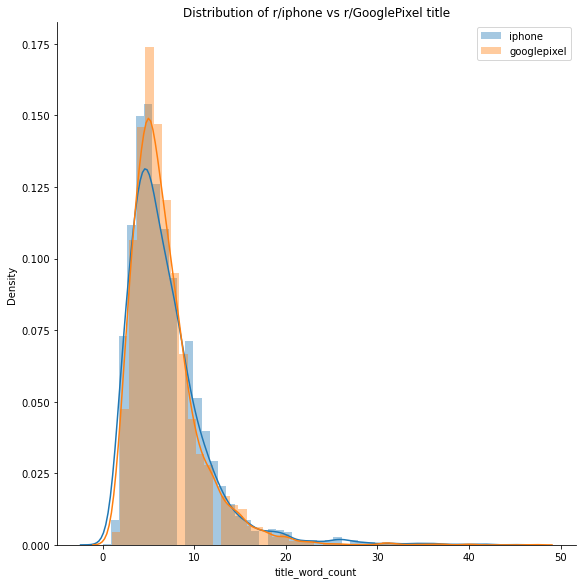

In [78]:
#plot distribution of r/iphone vs r/google title
plot = sns.FacetGrid(df3, hue='subreddit', height=8)
plot = plot.map(sns.distplot, 'title_word_count')
plt.title('Distribution of r/iphone vs r/GooglePixel title')
plt.ylabel('Density')
plt.legend();

/Users/cherylleong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cherylleong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


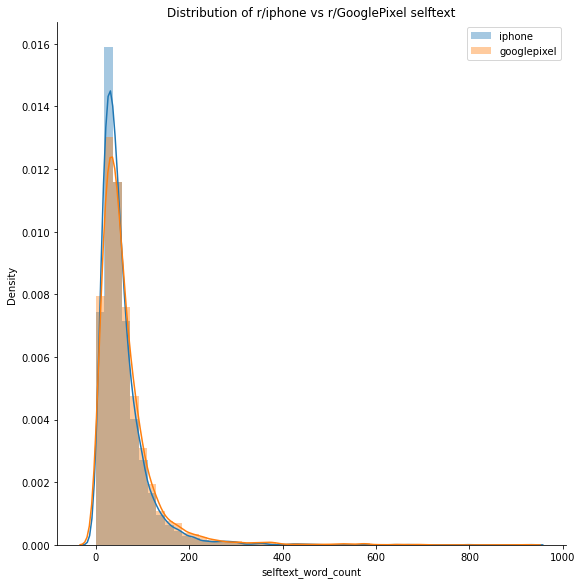

In [79]:
#plot distribution of r/iphone vs r/google selftext
plot2 = sns.FacetGrid(df3, hue='subreddit', height= 8)
plot2 = plot2.map(sns.distplot, 'selftext_word_count')
plt.title('Distribution of r/iphone vs r/GooglePixel selftext')
plt.ylabel('Density')
plt.legend();

In [67]:
#create variables for top 20 words
X1 = df2[df2['subreddit'] == 'iphone']['title']
y1 = df2[df2['subreddit'] == 'iphone']['subreddit']

X2 = df2[df2['subreddit'] == 'googlepixel']['title']
y2 = df2[df2['subreddit'] == 'googlepixel']['subreddit']

X3 = df2[df2['subreddit'] == 'iphone']['selftext']
y3 = df2[df2['subreddit'] == 'iphone']['subreddit']

X4 = df2[df2['subreddit'] == 'googlepixel']['selftext']
y4 = df2[df2['subreddit'] == 'googlepixel']['subreddit']

X5 = df2[df2['subreddit'] == 'iphone']['all']
y5 = df2[df2['subreddit'] == 'iphone']['subreddit']

X6 = df2[df2['subreddit'] == 'googlepixel']['all']
y6 = df2[df2['subreddit'] == 'googlepixel']['subreddit']

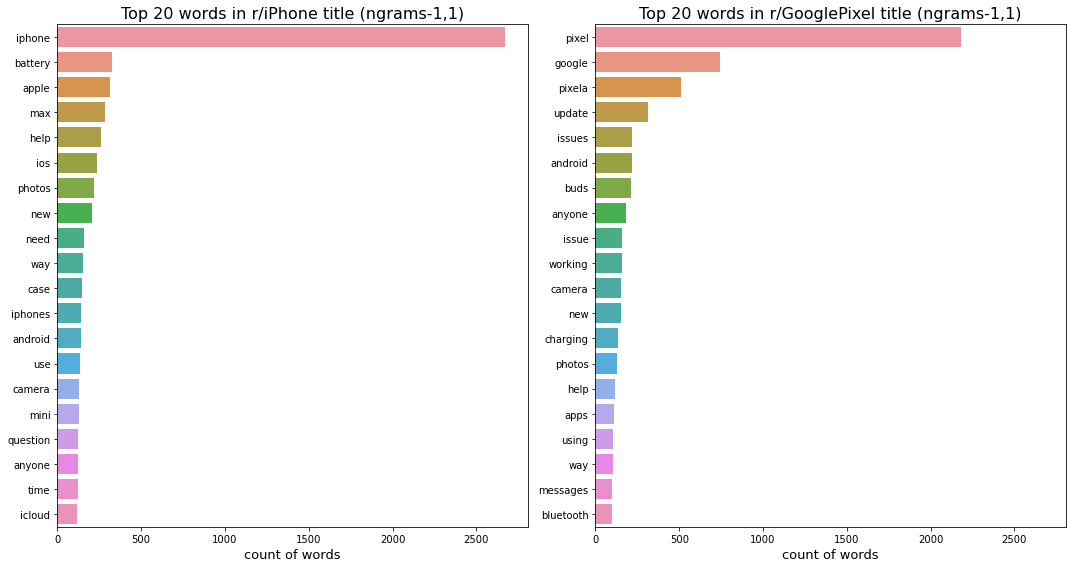

In [68]:
#top 20 words in both subreddit title
cvec = CountVectorizer(stop_words = stop_words)
X1_train = cvec.fit_transform(X1)
X1_train_df = pd.DataFrame(X1_train.todense(),                  
                          columns=cvec.get_feature_names())
X1_df = X1_train_df.sum().sort_values(ascending=False).head(200)

cvec2 = CountVectorizer(stop_words = stop_words)
X2_train = cvec2.fit_transform(X2)
X2_train_df = pd.DataFrame(X2_train.todense(),                  
                          columns=cvec2.get_feature_names())
X2_df = X2_train_df.sum().sort_values(ascending=False).head(200)

fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8), sharex = True)
sns.barplot(y=X1_df[0:20].index.values, x = X1_df[0:20],ax=ax[0])
ax[0].set_title('Top 20 words in r/iPhone title (ngrams-1,1)',fontsize=16)
ax[0].set_xlabel('count of words', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=10)

sns.barplot(y=X2_df[0:20].index.values, x = X2_df[0:20],ax=ax[1])
ax[1].set_title('Top 20 words in r/GooglePixel title (ngrams-1,1)',fontsize=16)
ax[1].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=10)

plt.tight_layout()

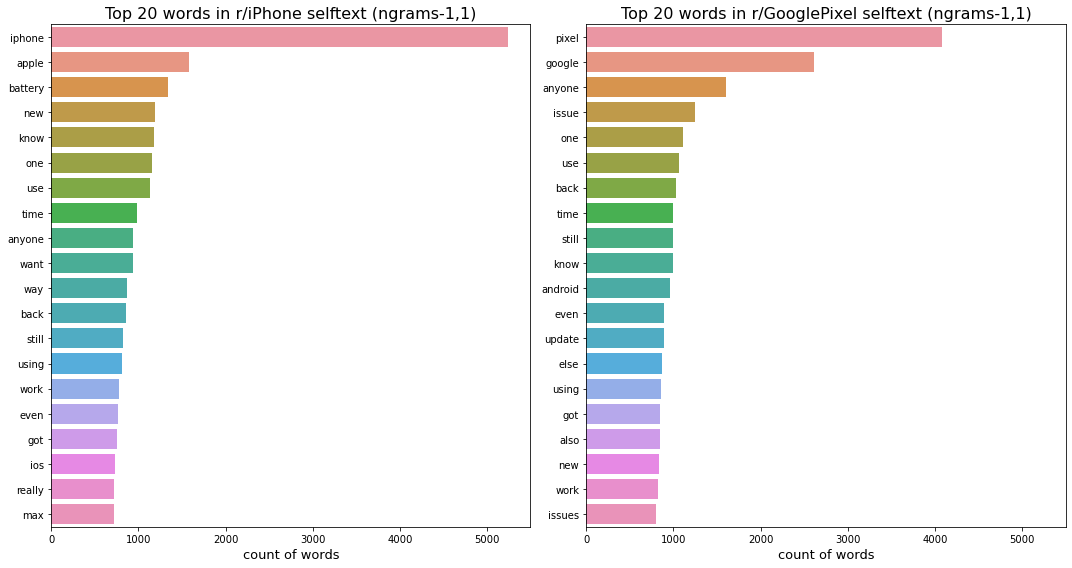

In [69]:
#top 20 words in both subreddit selftext
cvec3 = CountVectorizer(stop_words = stop_words)
X3_train = cvec3.fit_transform(X3)
X3_train_df = pd.DataFrame(X3_train.todense(),                  
                          columns=cvec3.get_feature_names())
X3_df = X3_train_df.sum().sort_values(ascending=False).head(200)

cvec4 = CountVectorizer(stop_words = stop_words)
X4_train = cvec4.fit_transform(X4)
X4_train_df = pd.DataFrame(X4_train.todense(),                  
                          columns=cvec4.get_feature_names())
X4_df = X4_train_df.sum().sort_values(ascending=False).head(200)

fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8), sharex = True)
sns.barplot(y=X3_df[0:20].index.values, x = X3_df[0:20],ax=ax[0])
ax[0].set_title('Top 20 words in r/iPhone selftext (ngrams-1,1)',fontsize=16)
ax[0].set_xlabel('count of words', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=10)

sns.barplot(y=X4_df[0:20].index.values, x = X4_df[0:20],ax=ax[1])
ax[1].set_title('Top 20 words in r/GooglePixel selftext (ngrams-1,1)',fontsize=16)
ax[1].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=10)

plt.tight_layout()

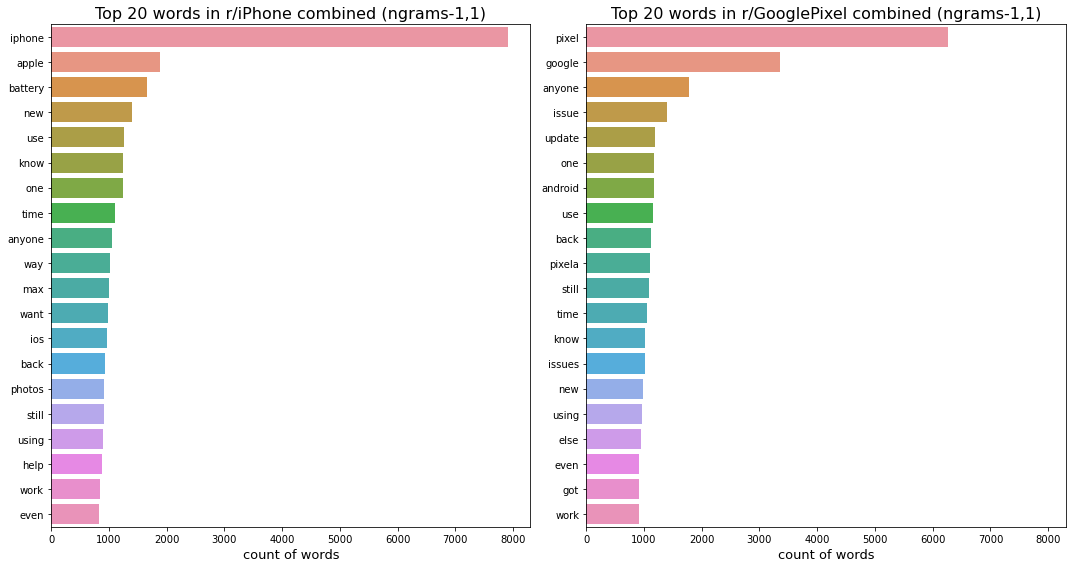

In [70]:
#top 20 words in both subreddit title and selftext combined
cvec5 = CountVectorizer(stop_words = stop_words)
X5_train = cvec5.fit_transform(X5)
X5_train_df = pd.DataFrame(X5_train.todense(),                  
                          columns=cvec5.get_feature_names())
X5_df = X5_train_df.sum().sort_values(ascending=False).head(200)

cvec6 = CountVectorizer(stop_words = stop_words)
X6_train = cvec6.fit_transform(X6)
X6_train_df = pd.DataFrame(X6_train.todense(),                  
                          columns=cvec6.get_feature_names())
X6_df = X6_train_df.sum().sort_values(ascending=False).head(200)

fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8), sharex = True)
sns.barplot(y = X5_df[0:20].index.values, x = X5_df[0:20],ax=ax[0])
ax[0].set_title('Top 20 words in r/iPhone combined (ngrams-1,1)',fontsize=16)
ax[0].set_xlabel('count of words', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=10)

sns.barplot(y = X6_df[0:20].index.values, x = X6_df[0:20],ax=ax[1])
ax[1].set_title('Top 20 words in r/GooglePixel combined (ngrams-1,1)',fontsize=16)
ax[1].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=10)

plt.tight_layout()

### Word Cloud

In [71]:
#create list for top words in lem_tokens
iphone_words = []
for text in df3[df3['subreddit'] == 'iphone']['lem_tokens']:
    iphone_words.append(text.split())
iphone_words = [x for mylist in iphone_words for x in mylist]
    
pixel_words = []
for text in df3[df3['subreddit'] == 'googlepixel']['lem_tokens']:
    pixel_words.append(text.split())
pixel_words = [x for mylist in pixel_words for x in mylist]

In [72]:
word_cloud_iphone = WordCloud(collocations = False,
                           background_color='black', colormap='Set2').generate(' '.join(iphone_words))

word_cloud_pixel = WordCloud(collocations = False,
                            background_color = 'black', colormap='Set2').generate(' '.join(pixel_words))

In [73]:
def cloud_generator(cloud):
    plt.figure(figsize=(15,8))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

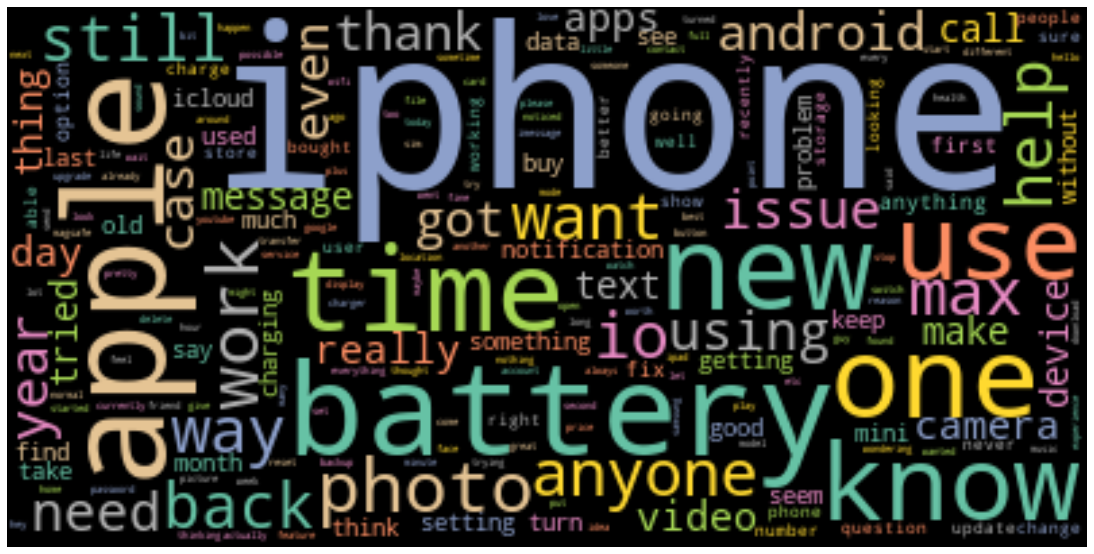

In [74]:
cloud_generator(word_cloud_iphone)

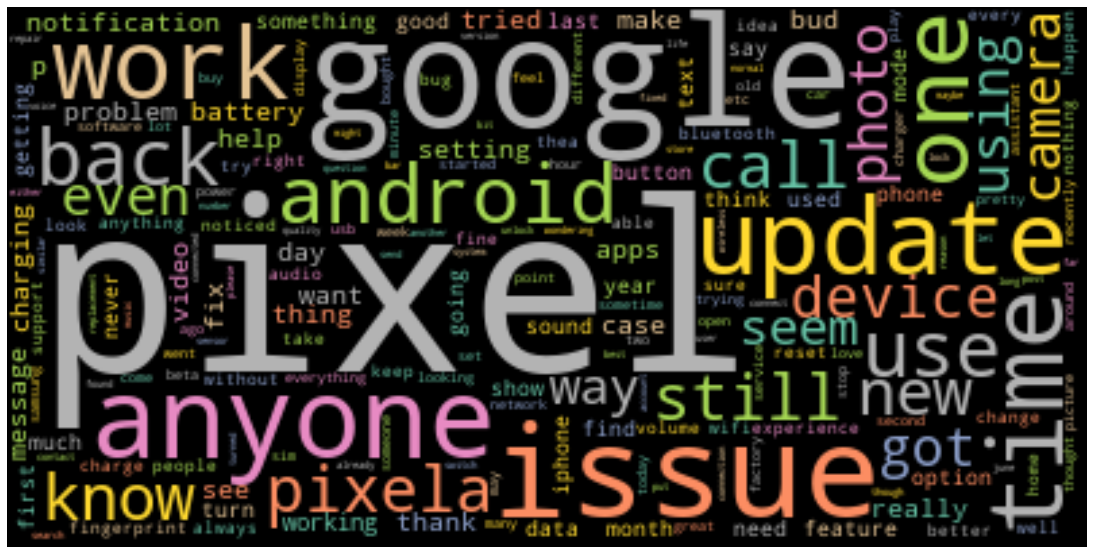

In [75]:
cloud_generator(word_cloud_pixel)

In [76]:
#save combined DataFrame
df3.to_pickle('datasets/combined.pkl')